In [ ]:
!pip install opencv-python opencv-python-headless fer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imageio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 39.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.w

Detected emotions for face at (81, 23, 182, 182): {'angry': 0.03, 'disgust': 0.0, 'fear': 0.19, 'happy': 0.09, 'sad': 0.38, 'surprise': 0.04, 'neutral': 0.26}


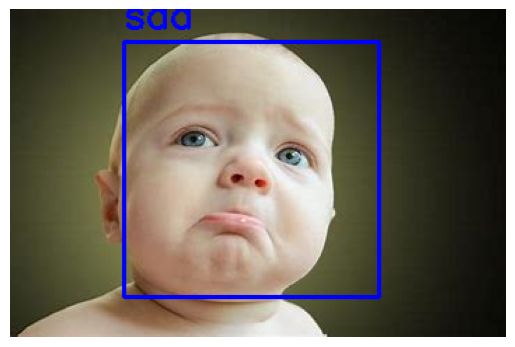

In [ ]:
import cv2
from fer import FER
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/i5.jpeg'
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Initialize the FER detector
detector = FER(mtcnn=True)

# Loop over the detected faces and analyze expressions
for (x, y, w, h) in faces:
    # Extract the face region
    face_region = image[y:y + h, x:x + w]

    # Detect expressions in the face region
    result = detector.detect_emotions(face_region)

    if result:
        # Get the bounding box and emotions from the result
        bounding_box = result[0]['box']
        emotions = result[0]['emotions']

        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Display the dominant emotion
        dominant_emotion = max(emotions, key=emotions.get)
        cv2.putText(image, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Print the detected emotions
        print(f"Detected emotions for face at ({x}, {y}, {w}, {h}): {emotions}")

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()